# First Programming Assignment

The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1 to 1.11, 2.1 to 2.6, 3.1 to 3.4, 4.1 to 4.6, 5.1 to 5.4. After each task description there is an answer cell for your code or text. For coding tasks they look like this:
```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!
There are also empty test cells, which are hidden tests. You can not check multiple choice questions or plots.

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the miug23-assignments folder.
- Do not override the original files in the miug23-assignments folder.
- For every plot make sure that axes are correctly labeled with original labels and not encoded ones. 
- Make sure that the titles of plots are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted.

#### Date of submission: Jun 02, 2023, 23:55 hrs

In [1]:
# This cell does all of the imports for you
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Spotify song data

In this assignment we will provide a similar dataset as the one used in the first chapters of *Machine Learning - A First Course for Engineers and Scientists*.

**Task 1.1**

Use pandas to load the dataset into a pandas data frame. The dataset is in a file called `songs_database.csv`. Call the variable that contains the pandas data frame `dataset`.

In [2]:
# YOUR CODE HERE
import pandas as pd
dataset = pd.read_csv("songs_database.csv")

In [3]:
### BEGIN TESTS
import warnings
warnings.simplefilter("ignore")
import hashlib
assert hashlib.md5(str(dataset.iloc[4,5]).encode()).hexdigest() == '7769ad8cf1483b5889d7a6d0f678754f'
### END TESTS

The definitions of the features can be found in the documentation of the Spotify API. The information below are copied from https://developer.spotify.com/documentation/web-api/reference/

| Feature | Definition|       
| :---: |:---|
| _explicit_ | The content item is explicit and the user’s account is set to not play explicit content. Additional reasons may be added in the future. |
| _name_ | Name of the track. |
| _danceability_ | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| _energy_ | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| _key_ | The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. |
| _loudness_ | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| _mode_ | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| _speechiness_ | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| _acousticness_ | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| _instrumentalness_ | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| _liveness_ | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| _valence_ | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| _tempo_ | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| _time_signature_ | An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |
| _artist_name_ | Name of the artist. |
| _Length (ln s)_ | Length of the track in ln(s). This is used in the book |

**Task 1.2**

Look at the first 5 samples (rows) of the dataset. There are many methods to do this, e.g. using pandas.

In [4]:
# YOUR CODE HERE
dataset.head(5)

,explicit,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name,Length (ln s)
0,False,I Contain Multitudes,0.513,0.0816,0.0,-19.555,1.0,0.0782,0.934,0.000132,0.1080,0.1290,132.491,4.0,Bob Dylan,5.623053
1,False,False Prophet,0.453,0.4410,0.0,-12.408,1.0,0.0556,0.437,0.000012,0.1470,0.6570,78.039,4.0,Bob Dylan,5.886140
2,False,My Own Version of You,0.599,0.2190,9.0,-19.148,1.0,0.3160,0.886,0.000195,0.0891,0.2140,170.841,3.0,Bob Dylan,5.994859
3,False,I've Made Up My Mind to Give Myself to You,0.654,0.1540,2.0,-19.006,1.0,0.0378,0.848,0.000116,0.1100,0.3310,134.909,3.0,Bob Dylan,5.971805
4,False,Black Rider,0.421,0.1150,2.0,-19.775,0.0,0.2800,0.900,0.000056,0.1100,0.0696,80.937,4.0,Bob Dylan,5.532966


Which of the 5 first songs has the highest danceability?

'a': I've Made Up My Mind to Give Myself to You

'b': They have the same energy

'c': Black Rider

'd': My Own Version of You

*Use a variable* `x12` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x12='e'`*.
There is only one correct answer.* 

In [5]:
# YOUR CODE HERE
x12 = 'a'

**Task 1.3**

In the outputs above you can see that the labels we want to use for the classification is the column `artist_name`, which can either be *Bob Dylan*, *The Beatles* or *KISS*. Save the class labels in the variable `y`.

In [6]:
# YOUR CODE HERE
#y = dataset['artist_name']
y = dataset.artist_name
y.head()

0    Bob Dylan
1    Bob Dylan
2    Bob Dylan
3    Bob Dylan
4    Bob Dylan
Name: artist_name, dtype: object

In [7]:
### BEGIN TESTS
assert hashlib.md5(str(y).encode()).hexdigest() == 'eb8cce8d26e9cf6eec926a0d33c40977'
### END TESTS

**Task 1.4**

What does the label encoder from scikit-learn (sklearn) do, if it is used in the right way?

'a': It encodes the class labels of plots to integer numbers.

'b': It encodes all class labels of a dataset to integer numbers.

'c': It encodes the class labels of input variables to integer numbers.

'd': It encodes the class labels of output variables to integer numbers.

*Use a variable* `x14` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x14='e'`*.
There is only one correct answer.* 

In [8]:
# YOUR CODE HERE
x14 = 'c'

**Task 1.5**

Use the label encoder from scikit-learn. Save the result in the variable `y_enc`.

In [9]:
# YOUR CODE HERE


# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the class labels
y_enc = encoder.fit_transform(y)

In [10]:
# This cell prints your encoding (Don't change it)
pd.DataFrame(data=encoder.transform(encoder.classes_), index=encoder.classes_, columns=["Coding"])

,Coding
Bob Dylan,0
KISS,1
The Beatles,2


In [11]:
### BEGIN TEST
assert hashlib.md5(str(y_enc.sum()).encode()).hexdigest() == '158fc2ddd52ec2cf54d3c161f2dd6517'
### END TEST

**Task 1.6**

Create a new variable `X_all` that contains a pandas data frame with all features except the artist names, title names and the feature `explicit`.

In [12]:
# YOUR CODE HERE
# List of columns to exclude
# exclude_columns = ['artist_name', 'name', 'explicit']
# Create a new DataFrame with all features except excluded columns
X_all = dataset.drop(columns=['artist_name', 'name', 'explicit'])


In [13]:
### BEGIN TESTS
assert hashlib.md5(str(X_all.sum().sum()).encode()).hexdigest() == 'b47668d8a4e333fabc3f16c74e7f6bf3'
### END TESTS

**Task 1.7**

Plot the kernel density estimation of the variable `loudness` using seaborn(`sns`). Display the classes as hue. Make sure your plot has a title, a legend and labels on the axes.

*Don't change the first line of code and don't add any additional `plot.figure()`. Your plot must stay assigned to the variable `fig_17`. It is used to check if your plot is correct.*

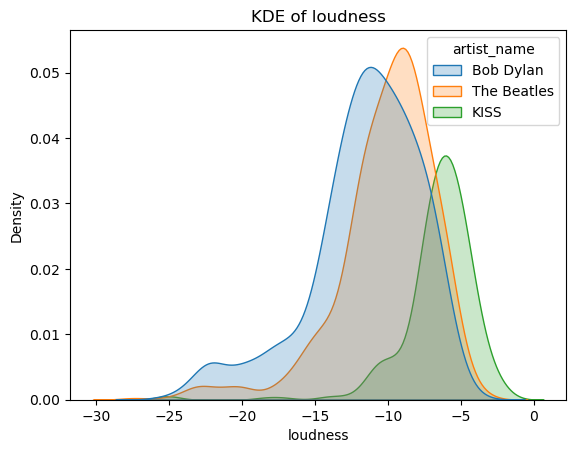

In [14]:
fig_17 = plt.figure()

# YOUR CODE HERE

# fig_17 = sns.kdeplot(data=dataset, x='loudness', hue='artist_name')
# plt.title("Kernel density Estimation 'Loudness' ")
# plt.xlabel("Loudness")
# plt.ylabel("Density")
# plt.legend(title="Artist", labels=dataset['artist_name'].unique())

sns.kdeplot(x=X_all["loudness"], fill=True, hue=dataset.artist_name)
plt.title('KDE of loudness')
plt.show()



plt.show()

**Task 1.8**

Plot the kernel density estimation of the variable `valence` using seaborn(`sns`). Display the classes as hue. Make sure your plot has a title, a legend and labels on the axes.

*Don't change the first line of code and don't add any additional `plot.figure()`. Your plot must stay assigned to the variable `fig_18`. It is used to check if your plot is correct.*

<Figure size 640x480 with 0 Axes>

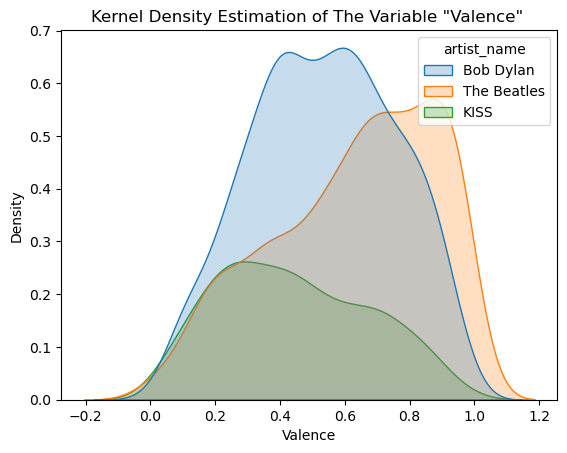

In [15]:
fig_18 = plt.figure()

# # YOUR CODE HERE
fig_18 = plt.figure()


a = dataset.artist_name

fig_18 = dataset.valence 
sns.kdeplot(x=fig_18, shade=True, color='g', hue=a)
plt.title('Kernel Density Estimation of The Variable "Valence" ')
plt.xlabel("Valence")
plt.ylabel("Density")


plt.show()
# sns.kdeplot(data=dataset, x='valence', hue='artist_name')
# plt.title("Kernel density estimation of 'Valence'")
# plt.xlabel("Valence")
# plt.ylabel("Density")
# plt.legend(title="Artist", labels=dataset['artist_name'].unique())

plt.show()

**Task 1.9**

Plot the two features from task 1.7 and 1.8 in one scatterplot using seaborn(`sns`). Plot `loudness` on the x-axis and `valence` on the y-axis. Display the classes as hue. Make sure your plot has a title, a legend and labels on the axes.

*Don't change the first line of code and don't add any additional `plot.figure()`. Your plot must stay assigned to the variable `fig_19`. It is used to check if your plot is correct.*

<Figure size 640x480 with 0 Axes>

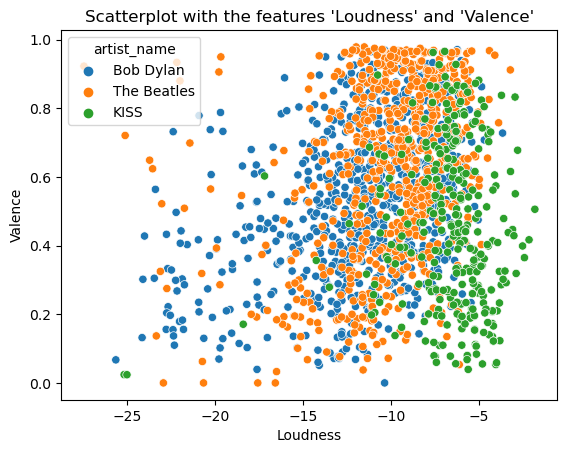

In [16]:
fig_19 = plt.figure()

# YOUR CODE HERE
# scatterplot for fig_17 and fig_18 using sns.
# scatter_fig_17 = sns.scatterplot(data=dataset, x='loudness',\
#                                  y='valence', hue='artist_name', marker='o')
# scatter_fig_18 = sns.scatterplot(data=dataset, x='loudness',\
#                                  y='valence', hue='artist_name', marker='D')

# plt.title("Scatterplot of loudness and valence")
# plt.xlabel("Loudness")
# plt.ylabel("Valence")

# plt.legend(title="Artist")

fig_19 = plt.figure()

sns.scatterplot(x=dataset.loudness, y=dataset.valence, hue=a)
plt.xlabel("Loudness")
plt.ylabel("Valence")
plt.title("Scatterplot with the features 'Loudness' and 'Valence'")

plt.show()

plt.show()

**Task 1.10**

Do a second scatterplot with the features `danceability` on the x-axis and `tempo` on the y-axis using seaborn(`sns`). Display the classes as hue. Make sure your plot has a title, a legend and labels on the axes.

*Don't change the first line of code and don't add any additional `plot.figure()`. Your plot must stay assigned to the variable `fig_110`. It is used to check if your plot is correct.*

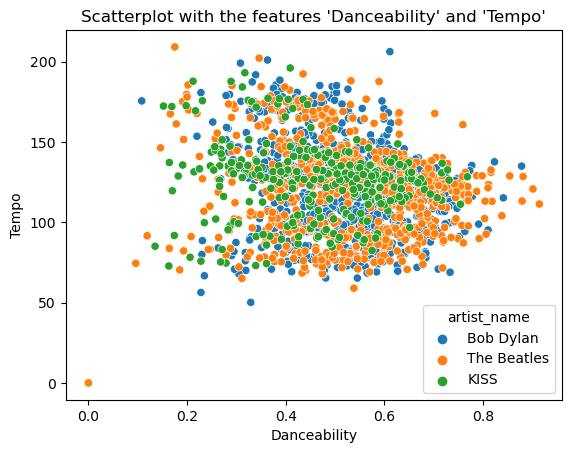

In [17]:
fig_110 = plt.figure()

# YOUR CODE HERE
# sns.scatterplot(data=dataset, x='danceability', y='tempo', hue='artist_name')

# plt.title("Scatterplot of Danceability and Tempo")
# plt.xlabel("Danceability")
# plt.ylabel("Tempo")

# plt.legend(title="Artist")


sns.scatterplot(x=dataset.danceability, y=dataset.tempo,hue=y, data=X_all)
plt.xlabel("Danceability")
plt.ylabel("Tempo")
plt.title("Scatterplot with the features 'Danceability' and 'Tempo'")

plt.show()




**Task 1.11**

![Scatterplot A](scatterplot_a.svg) ![Scatterplot B](scatterplot_b.svg)


These scatterplots are generated from a penguin dataset. The color of the dots (hue) show 2 classes (penguin species). Each scatterplot shows different features. Which features are most likely to result in a better classification, when used for training a model?

'a': Body mass and flipper length

'b': Bill depth and bill length

'c': Flipper length and bill length

'd': Body mass and bill depth

*Use a variable* `x19` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x19='e'`*.
There is only one correct answer.* 

In [18]:
# YOUR CODE HERE
x19 = 'c'

**Task 2.1**

Create a new variable `X_red` containing only the features *loudness* and *valence*.

In [19]:
# YOUR CODE HERE
#X_red = dataset[['loudness', 'valence']]

X_red = X_all[['loudness', 'valence']]
X_red.head()


,loudness,valence
0,-19.555,0.1290
1,-12.408,0.6570
2,-19.148,0.2140
3,-19.006,0.3310
4,-19.775,0.0696


# BEGIN TESTS
assert hashlib.md5(str(X_red.sum().sum()).encode()).hexdigest() == '178559616d4751475b5e575151f6c166'
### END TESTS

**Task 2.2**

Split the data (`X_red`) in training and test set using sklearn. Use 80% for training and set `random_state=84`. Use the variables `X_train`, `X_test`, `y_train` and `y_test`.

In [20]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X_red, y_enc, test_size=0.2, random_state=84)




print(X_train.sum())


loudness   -14390.5300
valence       789.2768
dtype: float64


In [21]:
### BEGIN TESTS
assert hashlib.md5(str(X_train.sum().sum()).encode()).hexdigest() == '467d0bf2f9d1496363022e93801ecea6'
assert hashlib.md5(str(X_test.sum().sum()).encode()).hexdigest() == '90de5159ddf7f12b9fb3a5a283ebfca2'
assert hashlib.md5(str(y_train.sum()).encode()).hexdigest() == 'a50abba8132a77191791390c3eb19fe7'
assert hashlib.md5(str(y_test.sum()).encode()).hexdigest() == 'bc6dc48b743dc5d013b1abaebd2faed2'
### END TESTS

**Task 2.3**

Show the quantities of the training and test set for each class via a histogram plot. The frequency must be plotted on the y-axis. Make sure your plot has a title, a legend and labels on the axes.

*Don't change the first line of code and don't add any additional `plot.figure()`. Your plot must stay assigned to the variable `fig_23`. It is used to check if your plot is correct.*

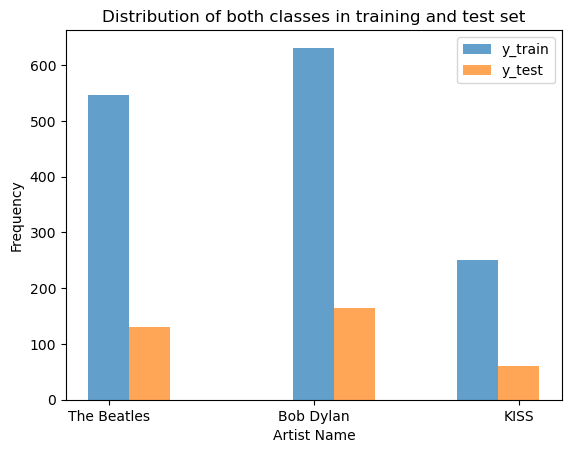

In [22]:
fig_23 = plt.figure()

# YOUR CODE HERE

plt.hist(encoder.inverse_transform(y_train),alpha=0.7, align='left')
# Plot the histogram of test labels
plt.hist(encoder.inverse_transform(y_test),alpha=0.7, align='right')
# Add the legend
plt.legend(['y_train', 'y_test'])
# Name the axes 
plt.ylabel('Frequency')
plt.xlabel('Artist Name')
# Set the title of the plot
plt.title("Distribution of both classes in training and test set")


# # histogram for training 
# plt.hist(y_train,alpha=0.7, label='Training_Set')

# # histogram for test
# plt.hist(y_test, alpha=0.7,label='Test_Set')

# plt.title("Quantities in Training and Test Sets")
# plt.xlabel("Class")
# plt.ylabel("Frequency")

# # Add legend
# plt.legend()


plt.show()

**Task 2.4**

What is the correct method to normalize the data before training a model.

'a': Determine the parameters of the normalization from all data and apply it to all data.

'b': Determine the parameters of the normalization from the training data and apply it to the training data.

'c': Determine the parameters of the normalization from the output training data and apply it to all data.

'd': Determine the parameters of the normalization from the input trainig data and apply it to all input data.

*Use a variable* `x24` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x24='e'`*.
There is only one correct answer.* 

In [23]:
# YOUR CODE HERE
x24 = 'b'

**Task 2.5**

Normalize your data using the StandardScaler from sklearn.

In [24]:
# YOUR CODE HERE
scaler = StandardScaler()
X_train.values[:] = scaler.fit_transform(X_train)
X_test.values[:] = scaler.transform(X_test)
X_train.head()

,loudness,valence
966,-0.728246,0.970722
272,1.300562,-0.317928
344,0.184705,-0.686113
21,-0.705815,0.847993
517,-0.104315,0.307988


In [25]:
### BEGIN TESTS
assert X_train.sum()[0] < 1e-13
assert X_train.sum()[1] < 1e-13
assert abs(X_test.sum()[0]) > 1
assert abs(X_test.sum()[1]) > 1
### END TESTS

**Task 2.6**

What changes could you observe if you would compare a scatterplot for `X_train` before the normalization with the StandardScaler with a scatterplot after normalization with the StandardScaler?

'a': There would be no differences.

'b': The separation of classes would be visibly better.

'c': The axes would have different scales.

'd': The scatterplot after normalization is a section of the one before.

*Use a variable* `x26` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x26='e'`*.
There is only one correct answer.* 

In [26]:
# YOUR CODE HERE
x26 = 'b'

**Task 3.1**

Initialize a k-NN classifier with `k=4`, save the object in the variable `knn` and train it.

In [27]:
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

#print(knn.n_samples_fit_)


KNeighborsClassifier(n_neighbors=4)

In [28]:
### BEGIN TEST
assert knn.n_neighbors == 4
assert knn.n_samples_fit_ == 1428
### END TEST

**Task 3.2**

Initialize a decision tree classifier. Set the random state to 365 and the splitting criterion to `'gini'`. Otherwise only restrict the depth of the tree to 3. Save the object in the variable `dct` and train it.

In [29]:
# YOUR CODE HERE
dct = DecisionTreeClassifier(random_state=365, criterion='gini', max_depth=3)
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=365)

In [30]:
### BEGIN TESTS
assert dct.criterion == 'gini'
assert dct.max_depth == 3
assert dct.random_state == 365
assert hashlib.md5(str(dct.feature_importances_[0]).encode()).hexdigest() == '978771ea948179d1a11f1df9c02763d6' or hashlib.md5(str(dct.feature_importances_[0]).encode()).hexdigest() == 'ca6b4dd8de6d847bf0ebac24d30502ec'
### END TESTS

**Task 3.3**

Plot the tree from task 3.2. The initial command `plt.figure(figsize=(18,6))` creates a bigger plot.

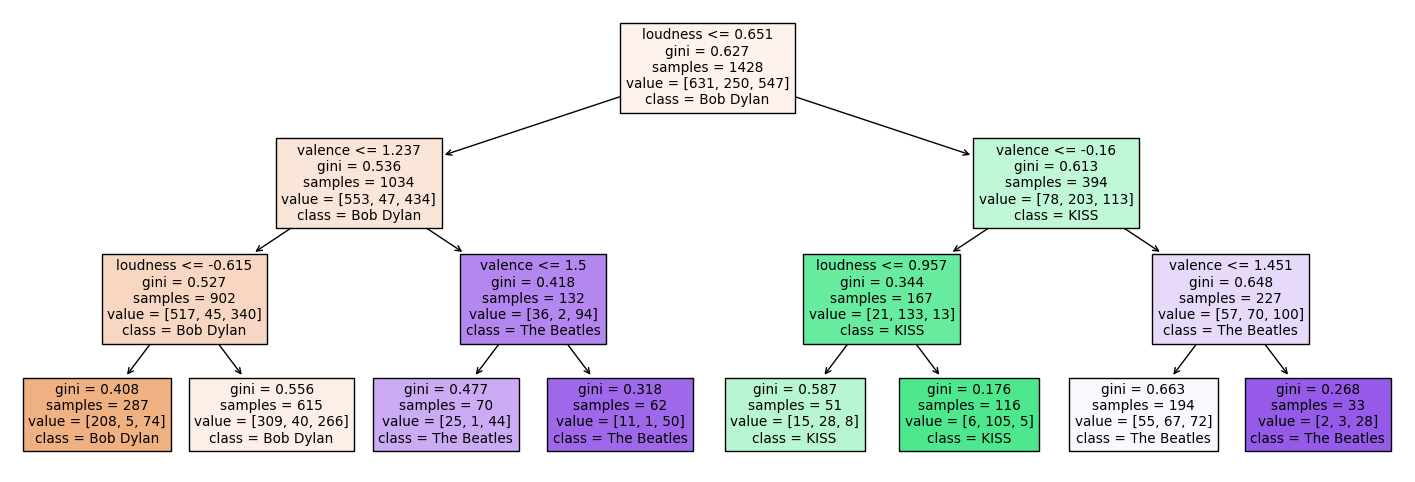

In [31]:
fig_33 = plt.figure(figsize=(18,6))
# YOUR CODE HERE
plot_tree(dct, feature_names=X_red.columns, class_names=encoder.classes_, filled=True)
plt.show()

How often does the tree branch?

'a': 5 times

'b': 6 times

'c': 7 times

'd': 8 times

*Use a variable* `x33` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x33='e'`*.
There is only one correct answer.* 

In [32]:
# YOUR CODE HERE
x33 = 'c'

**Task 3.4**

Why is training a full tree (no restrictions on depth, number of leaf nodes and number of samples for a split) not a good solution in most cases?

'a': The model follows the training data too closely.

'b': The model needs much more training data.

'c': The model is oversimplifying the problem.

'd': The model always predicts the class with more samples.

*Use a variable* `x34` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x34='e'`*.
There is only one correct answer.* 

In [33]:
# YOUR CODE HERE
x34 = 'c'

In [34]:
# X_red = X_all[['loudness', 'valence']]
# X_red.head()

# X_train, X_test, y_train, y_test = train_test_split(X_red, y_enc, test_size=0.2, random_state=84)




# print(X_train.sum())


**Task 4.1**

As we want to do binary classification metrics later, we need to simplify the task by dropping one class. Remove all samples from *Bob Dylan*. Use the same features as in task 2.1 (*loudness* and *valence*). Save your data in the variables `X_bin` and `y_bin`.

In [35]:
# YOUR CODE HERE
# X_bin = X_red[dataset['artist_name'] != 'Bob Dylan']
# y_bin = y_enc[dataset['artist_name'] != 'Bob Dylan']
'''
 X_bin = X_red[dataset['artist_name'] != 'Bob Dylan']
== y_enc!=0
'''
y_bin = y_enc[y_enc!=0]
X_bin = X_red[y_enc!=0]


In [36]:
### BEGIN TESTS
assert y_bin[y_bin==0].sum() == 0
assert hashlib.md5(str(y_bin.sum()).encode()).hexdigest() == '158fc2ddd52ec2cf54d3c161f2dd6517'
assert hashlib.md5(str(X_bin.sum()[0]).encode()).hexdigest() == '9609cd1943c362ddd25cc0c88c27665e' or hashlib.md5(str(X_bin.sum()[0]).encode()).hexdigest() == 'b3b2f5223d7b179c6149cd358030b6f8'
### END TESTS

**Task 4.2**

Do the scatterplot for the features of the two remaining classes. Plot `loudness` on the x-axis and `valence` on the y-axis. Display the classes as hue. Make sure your plot has a title, a legend and labels on the axes.

*Don't change the first line of code and don't add any additional `plot.figure()`. Your plot must stay assigned to the variable `fig_42`. It is used to check if your plot is correct.*

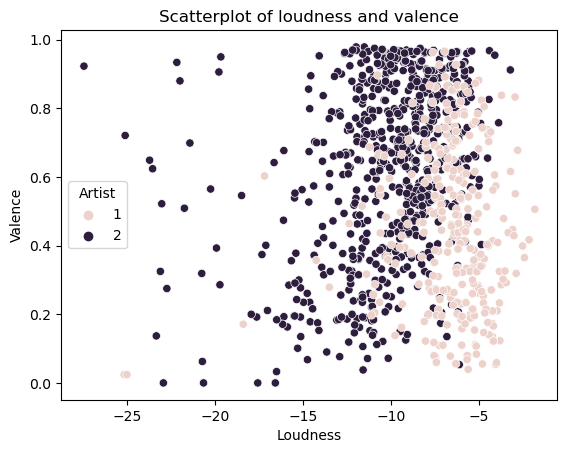

In [37]:
fig_42 = plt.figure()

# YOUR CODE HERE
#sns.scatterplot(x='loudness', y='valence', hue=encoder.inverse_transform(y_bin), datas=X_bin)
sns.scatterplot(data=X_bin, x='loudness', y='valence', hue=y_bin)

plt.title("Scatterplot of loudness and valence")
plt.xlabel("Loudness")
plt.ylabel("Valence")
plt.legend(title="Artist")


plt.show()

**Task 4.3**

Perform a training and test set split again. Set the random state to 42 and the size of the training data to 70%. Use the variables `X_bin_train`, `X_bin_test`, `y_bin_train` and `y_bin_test`.

In [38]:
# YOUR CODE HERE
X_bin_train, X_bin_test, y_bin_train, y_bin_test = \
    train_test_split(X_bin, y_bin, test_size=0.3, random_state=42)

In [39]:
### BEGIN TESTS
assert hashlib.md5(str(X_bin_train.sum().sum()).encode()).hexdigest() == '2936d262aa6dabe9050631e133aa1953'
assert hashlib.md5(str(X_bin_test.sum().sum()).encode()).hexdigest() == '390b9f2c29c596a3ada9e88325db7b5b'
assert hashlib.md5(str(y_bin_train.sum()).encode()).hexdigest() == '3eb71f6293a2a31f3569e10af6552658'
assert hashlib.md5(str(y_bin_test.sum()).encode()).hexdigest() == '7380ad8a673226ae47fce7bff88e9c33'
### END TESTS

**Task 4.4**

Show the quantities of the training and test set for each class via a histogram plot. The frequency must be plotted on the y-axis. Make sure your plot has a title, a legend and labels on the axes.

*Don't change the first line of code and don't add any additional `plot.figure()`. Your plot must stay assigned to the variable `fig_44`. It is used to check if your plot is correct.*

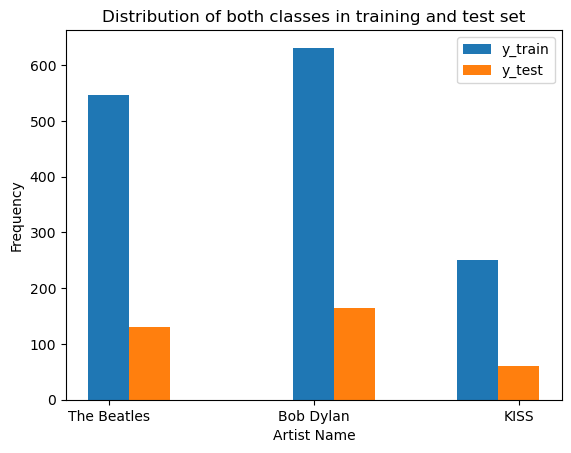

In [40]:
fig_44 = plt.figure()

# YOUR CODE HERE
plt.hist(encoder.inverse_transform(y_train), align='left')
plt.hist(encoder.inverse_transform(y_test), align='right')
plt.legend(['y_train', 'y_test'])
plt.ylabel('Frequency')
plt.xlabel('Artist Name')
plt.title("Distribution of both classes in training and test set")

# plt.hist(y_bin_train, alpha=0.7, label='Training Set')
# # histo for test
# plt.hist(y_bin_test, alpha=0.7, label='Test Set')

# plt.title("Quantities in training and test sets")
# plt.xlabel("Class")
# plt.ylabel("Frequency")
# plt.legend()

plt.show()


**Task 4.5**

Normalize your data using the StandardScaler from sklearn.

In [41]:
# YOUR CODE HERE

sc = StandardScaler()
# sc.fit(X_bin_train)
# X_bin_train.scaled = sc.transform(X_bin_train)
# X_bin_test.scaled = sc.transform(X_bin_test)

##
X_bin_train.values[:] = scaler.fit_transform(X_bin_train)
X_bin_test.values[:] = scaler.transform(X_bin_test)



In [42]:
### BEGIN TESTS
assert X_bin_train.sum()[0] < 1e-13
assert X_bin_train.sum()[1] < 1e-13
assert abs(X_bin_test.sum()[0]) > 1
assert abs(X_bin_test.sum()[1]) > 1
### END TESTS

**Task 4.6**

Initialize a decision tree classifier. Set the random state to 42 and the splitting criterion to 'gini'. Otherwise only restrict the depth of the tree to 5. Save the object in the variable `dct_bin` and train it.

In [43]:
# YOUR CODE HERE
dct_bin = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5)
dct_bin.fit(X_bin_train, y_bin_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [44]:
### BEGIN TESTS
assert dct_bin.criterion == 'gini'
assert dct_bin.max_depth == 5
assert dct_bin.random_state == 42
assert hashlib.md5(str(dct_bin.feature_importances_[0]).encode()).hexdigest() == '60a686ccf35b05a509158d09203a4dc4' or hashlib.md5(str(dct_bin.feature_importances_[0]).encode()).hexdigest() == 'b1c036da5b9bde1e0ee437f8d58da3f3'
### END TESTS

**Task 5.1**

Plot the confusion matrix of your classifier for the training data. Make sure your plot has a title and all labels.

<Figure size 640x480 with 0 Axes>

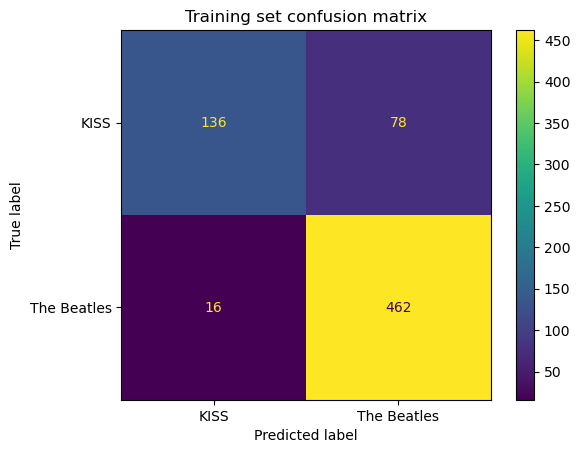

In [45]:
fig_51 = plt.figure()

# YOUR CODE HERE
dct_bin = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5)
dct_bin.fit(X_bin_train, y_bin_train)

y_train_pred = dct_bin.predict(X_bin_train)
ConfusionMatrixDisplay.from_predictions(y_bin_train, y_train_pred, display_labels=encoder.classes_[1:3])

plt.title('Training set confusion matrix')

plt.show()

How many songs from The Beatles where classified as songs from KISS in the training set?

'a': 16

'b': 78

'c': 47

'd': 25

*Use a variable* `x51` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x51='e'`*.
There is only one correct answer.* 

In [46]:
# YOUR CODE HERE
x51 = 'b'

**Task 5.2**

Plot the confusion matrix of your classifier for the test data. Make sure your plot has a title and all labels.

<Figure size 640x480 with 0 Axes>

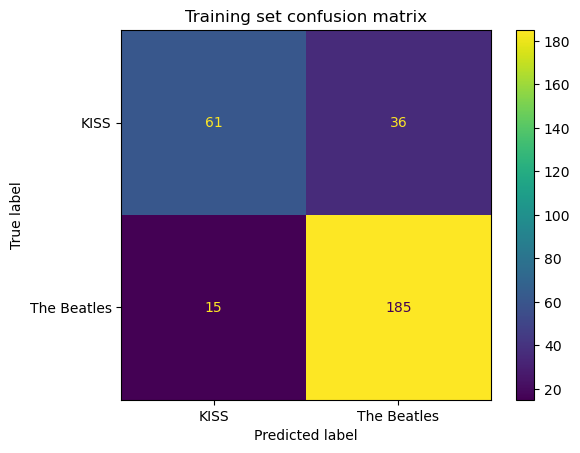

In [47]:
fig_52 = plt.figure()

# # YOUR CODE HERE

dct_bin = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5)
dct_bin.fit(X_bin_train, y_bin_train)

y_test_pred = dct_bin.predict(X_bin_test)
ConfusionMatrixDisplay.from_predictions(y_bin_test, y_test_pred, display_labels=encoder.classes_[1:3])

plt.title('Training set confusion matrix')



plt.show()

How many songs from The Beatles where classified as songs from KISS in the test set?

'a': 61

'b': 185

'c': 15

'd': 36

*Use a variable* `x52` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x52='e'`*.
There is only one correct answer.* 

In [48]:
# YOUR CODE HERE
x52 = 'd'

**Task 5.3**

Which values could you directly read from a confusion matrix?

'a': Precision and recall

'b': F<sub>1</sub> and F<sub>ß</sub>

'c': ROC and precision-recall

'd': True/false positives/negatives

*Use a variable* `x53` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x53='e'`*.
There is only one correct answer.* 

In [49]:
# YOUR CODE HERE
x53 = 'd'

**Task 5.4**

Is this a balanced or imbalanced problem? Which metric should you usually prefere for this?

'a': Missclasification rate

'b': F<sub>1</sub> score

'c': Accuracy

'd': ROC curve

*Use a variable* `x54` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x54='e'`*.
There is only one correct answer.* 

In [51]:
# YOUR CODE HERE
x54 = 'b'